In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
file_path='/content/drive/My Drive/Machine learning/headbrain.csv'
data=pd.read_csv(file_path)
print(df.head())



   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [62]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [63]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [64]:
numerator = np.sum((X - mean_x) * (Y - mean_y))
denominator = np.sum((X - mean_x) ** 2)

w1 = numerator / denominator
w0 = mean_y - (w1 * mean_x)

print(f"w1 (slope): {w1}")
print(f"w0 (intercept): {w0}")

w1 (slope): 0.2634293394893993
w0 (intercept): 325.5734210494428


In [65]:
def predict(x):
    return w0 + w1 * x

In [66]:
Y_pred = predict(X)

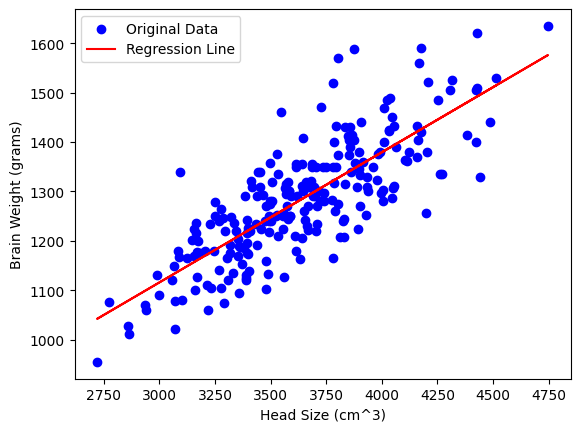

In [67]:
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [68]:
mse = np.mean((Y - Y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5201.3840280023305


In [69]:
from sklearn.linear_model import LinearRegression

X_reshaped = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, Y)

Y_pred_sklearn = model.predict(X_reshaped)

mse_sklearn = np.mean((Y - Y_pred_sklearn) ** 2)

print(f"Sklearn Linear Regression coefficients: w0={model.intercept_}, w1={model.coef_[0]}")
print(f"Sklearn Mean Squared Error: {mse_sklearn}")

Sklearn Linear Regression coefficients: w0=325.5734210494426, w1=0.26342933948939934
Sklearn Mean Squared Error: 5201.3840280023305
